# Decision Trees, using sklearn

** Please Note: **

I had to first install GraphViz.
For Windows, I used the MSI version here. (http://www.graphviz.org/Download_windows.php)

Installed it (by double-clicking the xx.msi file).

Change the Environment variables:
(https://stackoverflow.com/a/20458620/918215)

Verify using $PATH
Then pydot, pydotplus etc worked.

In [2]:
#pip install pydot
#pip install pydotplus

In [3]:
from sklearn import tree
X = [[0, 0], [1, 1], [2, 1], [4, 7], [3,4]]
y = [1, 1, 0, 0, 0 ]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

In [4]:
X

[[0, 0], [1, 1], [2, 1], [4, 7], [3, 4]]

In [5]:
clf.predict([[4., 4.]])

array([0])

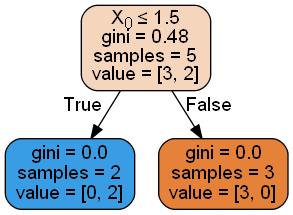

In [6]:
import pydotplus
from IPython.display import Image  
dot_data = tree.export_graphviz(clf, out_file=None, 
                         #feature_names=iris.feature_names,  
                         #class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())   

In [7]:
clf.predict_proba([[2., 2.]])

array([[ 1.,  0.]])

In [8]:
from sklearn.datasets import load_iris
iris = load_iris()

In [9]:
iris.data.shape

(150, 4)

In [10]:
iris.data[:10,:]

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1]])

In [11]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Let's split the data into test and train.

We will build a decision tree on the TRAIN data. (70% or 105 points)

We will TEST our PREDICTIONS on the TEST data set (30% or 45 points)

In [12]:
from sklearn.model_selection import train_test_split

# We have already loaded the data:
# iris = load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y ,
                                                    test_size=0.30, 
                                                    random_state=42)

In [13]:
y_train.shape

(105,)

In [14]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [15]:
with open("iris.dot", 'w') as f:
    f = tree.export_graphviz(clf, out_file=f)

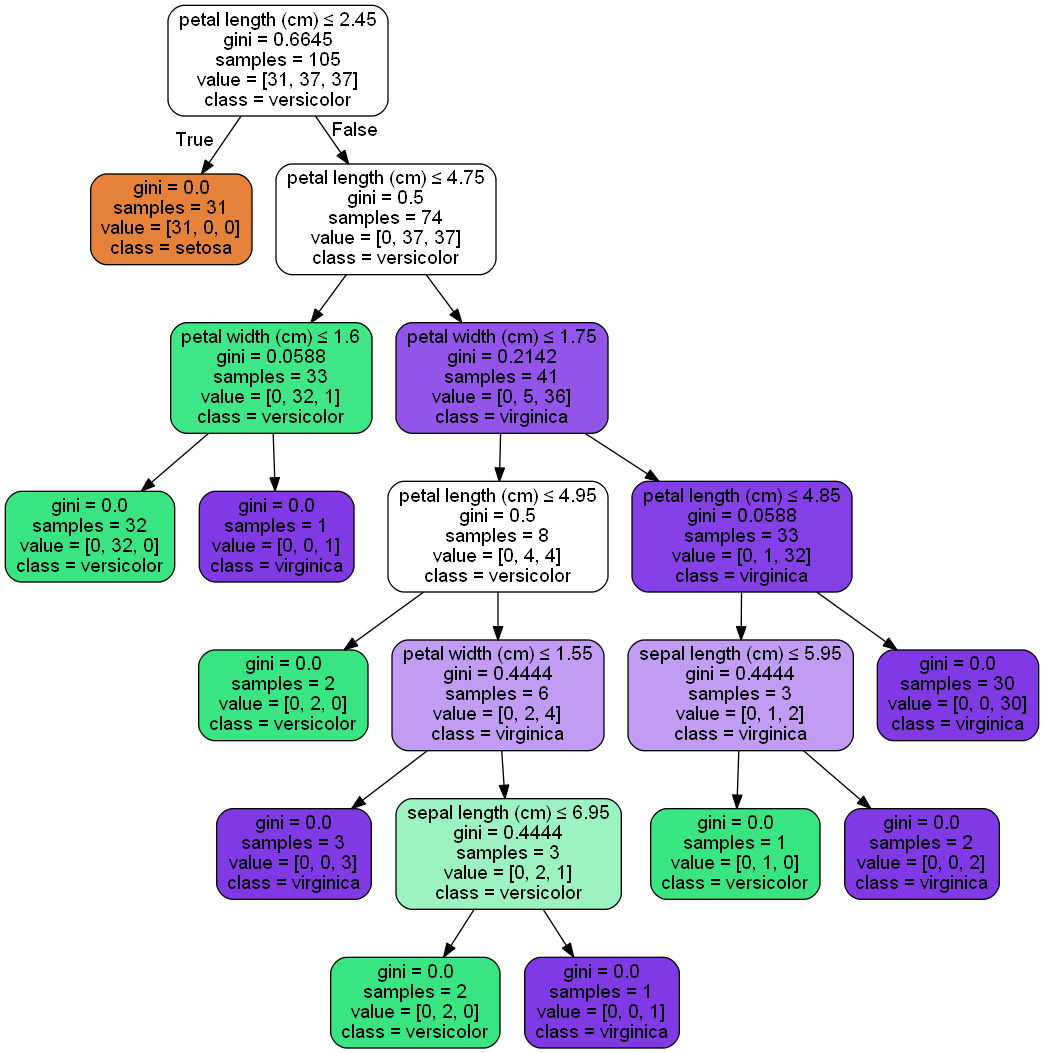

In [16]:
import pydotplus
from IPython.display import Image  
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())   

# Make Predictions Using the DTree


In [17]:
#Now that we have clf already built, 
#it is simple to make it predict for data
# it has not seen
clf.predict(X_test)

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2, 0,
       2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0, 0])

# Are these Predictions Any Good?

How do they compare to the true values (of species?)

In [18]:
from sklearn.metrics import confusion_matrix


y_pred = clf.predict(X_test)
y_true = y_test

confusion_matrix(y_true, y_pred)


array([[19,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]])

# It got everything correct! That is impressive

# What if we built very small trees? Would that still work?

## There is a parameter called "max_depth" 

### Let's try playing with that...

In [25]:

clf_small = tree.DecisionTreeClassifier(max_depth=1)
clf_small = clf_small.fit(X_train, y_train)

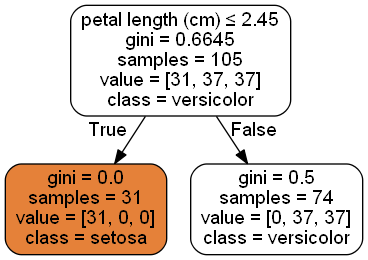

In [26]:
dot_data = tree.export_graphviz(clf_small, out_file=None, 
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())   

In [19]:

clf_small = tree.DecisionTreeClassifier(max_depth=2)
clf_small = clf_small.fit(X_train, y_train)

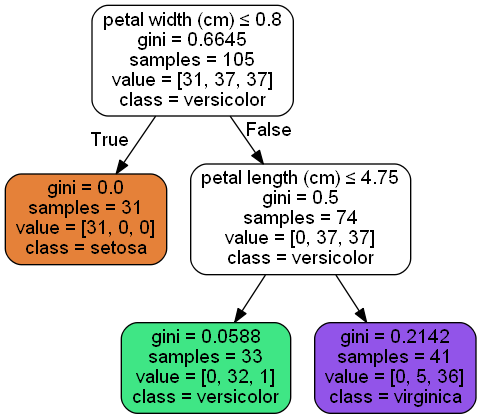

In [21]:
dot_data = tree.export_graphviz(clf_small, out_file=None, 
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())   